## Tabular Playground Series - JUN

参考にしたノートブック

**Very happy and honored. :)**

- [⚫ Dark Mode Visualization (Apple Version)](https://www.kaggle.com/subinium/dark-mode-visualization-apple-version)
- [[TPS-Apr] Highlighting the Data ✨✨✨](https://www.kaggle.com/subinium/tps-apr-highlighting-the-data)
- [[TPS-May] Categorical EDA](https://www.kaggle.com/subinium/tps-may-categorical-eda)
- [[TPS-Jun] This is Original EDA & VIZ 😉](https://www.kaggle.com/ktamta/tps-jun-this-is-original-eda-viz/edit)

**Please enjoy.**

## Introduction

使用するデータセットはCTGANを用いて作成された

元のデータセットはeCommerceの商品のカテゴリーを予測するというタスクである

今回のデータセットには**75個の特徴量**と**9個のラベル**があり予測が大変...

#### 評価指標

$$\mbox{log loss} = -\frac{1}{N}∑_{𝑖=1}^{𝑁}∑_{𝑗=1}^{M}𝑦_{𝑖𝑗} \log(𝑝_{𝑖𝑗})$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# matplotlib setting
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [ ]:
train = pd.read_csv('../input/tabular-playground-series-jun-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-jun-2021/test.csv')
sample_submission = pd.read_csv('../input/tabular-playground-series-jun-2021/sample_submission.csv')

## 訓練データ

In [ ]:
train

## 

In [ ]:
test

In [ ]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

## EDA（探索的データ解析）

各特徴量の統計的情報を可視化

参考にしたコード
- [[TPS-May] Categorical EDA](https://www.kaggle.com/subinium/tps-may-categorical-eda)

### 訓練データについて可視化
半分以上のデータについて特徴量の値が0である特徴量が多い

全特徴量について、少なくともデータの25%の特徴量の値は0である

In [ ]:
train.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                             .background_gradient(subset=['std'], cmap='Reds')\
                             .background_gradient(subset=['50%'], cmap='coolwarm')

### テストデータについて可視化
半分以上のデータについて特徴量の値が0である特徴量が多い

全特徴量について、少なくともデータの25%の特徴量の値は0である

In [ ]:
test.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                             .background_gradient(subset=['std'], cmap='Reds')\
                             .background_gradient(subset=['50%'], cmap='coolwarm')

各特徴量の分布の図示

In [ ]:
df_train = pd.read_csv('../input/tabular-playground-series-jun-2021/train.csv', index_col = 'id')
X_train = df_train.copy().drop('target', axis = 1)
features = X_train.columns

plt.figure(figsize=(15,70))

for i,col in enumerate(features):    
    plt.subplot(25,3,i + 1)
    sns.distplot(df_train.loc[:,col])
    plt.ylabel('')
    plt.tight_layout()

plt.show()

各特徴量の0の個数の割合を可視化

個数が最も少ない特徴量でも約30％が0であり、個数が最も多い特徴量では全体の約80％が0である。

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

ax.bar(range(75), 100, linewidth=0.2, edgecolor='black', alpha=0.2, color='lightgray')
ax.bar(range(75), ((train == 0).sum() / len(train)*100)[:-1].sort_values(), linewidth=0.2, edgecolor='black', alpha=1, color='#244747')

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 100, 10))

ax.set_xticks(range(0, 75, 5))
ax.margins(0.01)
ax.grid(axis='y', linestyle='--', linewidth=0.2, zorder=5)
ax.set_title('Ratio of Zeros (Sorted)', loc='center', fontweight='bold')
ax.set_ylabel('ratio(%)', fontsize=12)
ax.legend()
plt.show()

## 予測ラベルの分布

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(7, 4)
ax = fig.add_subplot(gs[:-1,:])
ax2 = fig.add_subplot(gs[-1,:])
ax2.axis('off')

target_cnt = train['target'].value_counts().sort_index()
target_cum = target_cnt.cumsum()
ax.bar(target_cnt.index, target_cnt, color=['#d4dddd' if i%2==0 else '#fafafa' for i in range(9)],
       width=0.55, 
       edgecolor='black', 
       linewidth=0.7)


for i in range(9):
    ax.annotate(f'{target_cnt[i]}({target_cnt[i]/len(train)*100:.3}%)', xy=(i, target_cnt[i]+1000),
                   va='center', ha='center',
               )
    ax2.barh([0], [target_cnt[i]], left=[target_cum[i] - target_cnt[i]], height=0.2, 
            edgecolor='black', linewidth=0.7, color='#d4dddd' if i%2==0 else '#fafafa'
            )
    ax2.annotate(i+1, xy=(target_cum[i]-target_cnt[i]/2, 0), 
                 va='center', ha='center', fontsize=10)

ax.set_title('Target Distribution', weight='bold', fontsize=15)
ax.grid(axis='y', linestyle='-', alpha=0.4)

fig.tight_layout()
plt.show()

In [ ]:
target_cnt_df = pd.DataFrame(target_cnt)
target_cnt_df['ratio(%)'] = target_cnt_df/target_cnt.sum()*100
target_cnt_df.sort_values('ratio(%)', ascending=False, inplace=True)
target_cnt_df['cummulated_sum(%)'] = target_cnt_df['ratio(%)'].cumsum()
target_cnt_df

全9クラスあるが、Class_6, Class_8がそれぞれ全体の25%以上を占めている。

Class_1, Class_4, Class_5, Class_7を合わせても全体の10%以下しかない。

## EDAの結果
- 値が0である特徴量が多い
    - 各データについて**非ゼロの特徴量数を新しい特徴量として追加**すると良いのでは
    - 金森さんが非ゼロの個数や最大値、総和などを新しい特徴量として追加することで**予測精度の向上を実現**！
- データによっては最大値が300あり、このデータを外れ値として削除する
    - この方法では精度が悪化することが報告されている
    - データが正規分布に従っていないため、外れ値を削除する方法が使えないのでは...と考察している人がいました
    - データを正規化すれば意味がある or 木構造を用いたモデルでは外れ値の影響が少ない等のコメントがあり、要検討
- 少数クラスに対する予測をどのように行うか
    - クラスに重みをつける

## 上位の人はどのようなことをしていたのか
Discussionで今回のコンペで2位だった人が解法を紹介してくれている

以下のようにモデルを複数個作り、それぞれの予測を組み合わせることで高い予測精度を実現
1. ニューラルネット + 勾配ブースティング
2. 簡単なニューラルネット + k近傍法を用いた特徴量生成
3. 簡単なニューラルネット
4. 自動で機械学習ができるパッケージを利用

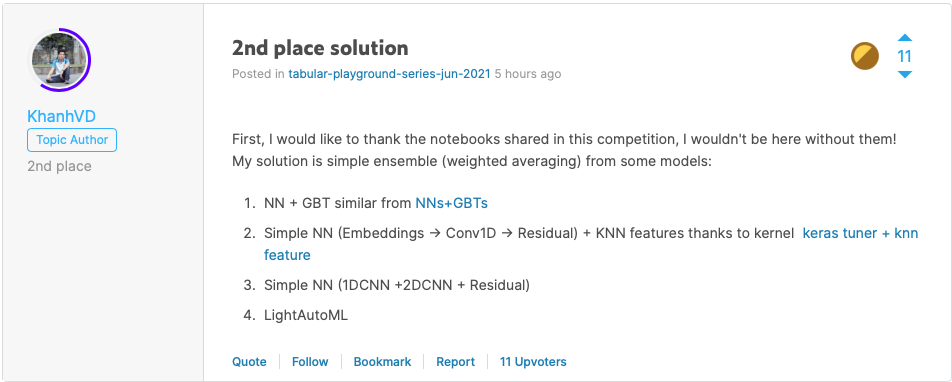

上位4%（46位）の人はノートブックを公開しており、**特徴量の追加などをせずにニューラルネットを作る**ことで高い予測精度を実現

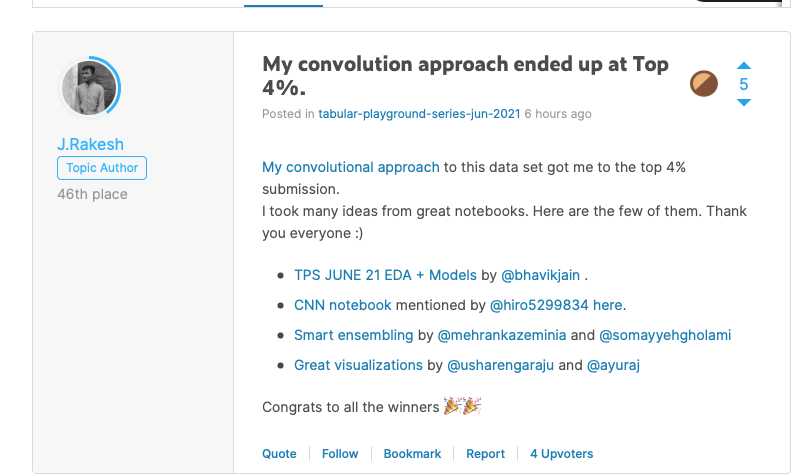